# Notes


- Exam 1 next Wednesday
- HW due Wednesday
- Piazza questions

# Review on stoichiometry and rate laws


## The rate of disappearance of a reactant



-   Now, recalling that $X = \frac{N_{A_j} - N_{A_j,0}}{\alpha_j}$, we arrive at:

\begin{equation}
\frac{dX}{dt} = \frac{1}{\alpha_j} \frac{dN_{A_J}}{dt}
\end{equation}

or rearranging, and using $R^*$:

\begin{equation}
\frac{dN_{A_J}}{dt} = \alpha_j R^*
\end{equation}

-   Thus, the change in composition of species J *due to the reaction* is just the stoichiometric coefficient for that species times the reaction rate. If the volume is constant:

\begin{equation}
r = R^* / V = \frac{d\xi}{dt}
\end{equation}

This defines the intensive reaction rate, with units of mol / vol / time.

That also leads to (only for constant volume!)

\begin{equation}
\frac{dC_{A_J}}{dt} = \alpha_j r
\end{equation}

-   We define the species rate of production as:

\begin{equation}
r_j = \alpha_j r
\end{equation}

-   This is **NOT** the rate law!
    -   It is a relationship between the rate of appearance of a species and the reaction rate
    
    -   One of our goals is to find the function that describes the rate of the reaction and its dependence on concentration and temperature
    
    -   This will come later in the course.




# Membrane reactors



-   A membrane reactor is typically like a plug flow reactor, but one reactant selectively passes across the membrane into the reactor, or a product selectively passes across the membrane, out of the reactor.

![img](./images/membrane-reactor.png)

-   The mole balance is similar to the plug flow reactor

-   We need a new term in our mole balance because there is an additional flow of material into the reactor

-   We consider the differential volume again, and in the limit of $\Delta V \rightarrow 0$ we have to know the flux across the surface of the membrane per unit volume.

$ \frac{dF_A}{dV} = r_A + R_A  $

-   where $R_A$ will be an expression for the flux across the membrane per unit volume of the reactor.
-   Similar to the case where we had a pressure drop, we need a model that describes the flux across the membrane
    -   This requires some knowledge of the transport process across the membrane
    -   For diffusion we might choose $R_A = a k_{c,A}(C_{A,s} - C_A)$
        -   where $C_A$ is the concentration of $A$ in the reactor, and $C_{A,s}$ is the concentration of $A$ outside the reactor.
        -   If $C_{A,s} > C_A$ there is a net flux of $A$ into the reactor
        -   $a$ is the surface area per unit volume (for a tubular reactor, $a=4/D$)
        -   k<sub>c,A</sub> is an overall mass transfer coefficient in m/s

-   Since we have a situation where the molar flow is changing down the length of the reactor due to transport and reaction, we have to consider the effect on the volumetric flowrate and concentrations

-   Let us consider a single reaction, $A \rightarrow B + C$, where $B$ is permeable to the walls of the reactor, and diffuses out.
-   let $k = 0.7$ 1/min, $k_b' = k_b a =  0.2$ 1/min
-   let $-r_A = k C_A$
-   the inlet molar flow is 10 mol/min at a concentration of 0.2 mol/L
-   Assume that the outside of the reactor is swept by an inert gas, so $C_{B,s} = 0$.
-   Estimate the exit concentrations at V = 400 L

-   We cannot simply relate the species by stoichiometry here, because the molar flow of $B$ is affected by reaction and transport.
-   We need a mole balances for each species
-   For species that does not cross the membrane, we use the same mole balance as a PFR.



In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k = 0.7     # rate constant  1/min
kb = 0.2    # mass transfer coefficent * a  1/min

Ca0 = 0.2   # mol / L
Fa0 = 10.0  # mol / min
Ft0 = Fa0   # Fb0, Fc0 = 0

v0 = Fa0 / Ca0  # inlet volumetric flow

Cbs = 0.0    # concentration of B outside shell


def dFdV(F, V):
    Fa, Fb, Fc = F     # unpack the variables
    Ft = Fa + Fb + Fc  # compute total molar flow

    v = v0 * Ft / Ft0  # compute corrected volumetric flowrate
    Ca = Fa / v        # compute concentrations
    Cb = Fb / v
    ra = -k * Ca       # compute reaction rate
    rb = -ra
    rc = -ra
    Rb = kb * (Cbs - Cb)  # rate of mass transfer across shell

    # define the mole balances
    dFadV = ra
    dFbdV = rb + Rb
    dFcdV = rc
    return [dFadV, dFbdV, dFcdV]

Vspan = np.linspace(0.0, 400.0)  # liters
F0 = [Fa0, 0, 0]
sol = odeint(dFdV, F0, Vspan)
Faexit, Fbexit, Fcexit = sol[-1, :]
print('''Fa_exit = {0} mol/min
Fb_exit = {1} mol/min
Fc_exit = {2} mol/min'''.format(Faexit, Fbexit, Fcexit))

v_exit = v0 * (Faexit + Fbexit + Fcexit) / Ft0

print('''Ca_exit = {0} mol/L
Cb_exit = {1} mol/L
Cc_exit = {2} mol/L'''.format(Faexit / v_exit, Fbexit / v_exit, Fcexit / v_exit))

Fa_exit = 0.23592352651668289 mol/min
Fb_exit = 4.469312535575382 mol/min
Fc_exit = 9.764076473483316 mol/min
Ca_exit = 0.003261019152591015 mol/L
Cb_exit = 0.06177643235760899 mol/L
Cc_exit = 0.1349625484898 mol/L


-   What you can see here is that $F_C$ and $F_A$ can be related by stoichiometry:



In [2]:
Fa0 = 10.0
Fa_exit = 0.235923526517
xi = (Fa_exit - Fa0) / -1  # reaction extent

Fc_exit = xi * 1  # extent * stoichiometry
print(Fc_exit)

9.764076473483


-   However, $F_B$ cannot be related by stoichiometry (or reaction extent) because it also changes by transport across the reactor walls

-   This is an introduction to the membrane reactor
-   Where the membrane reactor has real impact is when multiple reactions are present, and selectivity is important.
-   Membrane reactors are especially helpful in cases where equilibrium limits exist

-   We will see more of these in future lectures.



## Core/shell membrane exchanger

counterflow transport pass by reference, pass by value, stack

Fa_exit = 0.2423037896494297 mol/min
Fb_exit = 4.618518072580439 mol/min
Fc_exit = 9.75769621035057 mol/min
Fb2_exit = 0.16082186222987033 mol/min
Ca_exit = 0.003315025345885263 mol/L
Cb_exit = 0.0631872266347335 mol/L
Cc_exit = 0.13349774801938122 mol/L


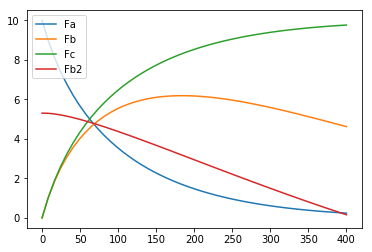

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k = 0.7     # rate constant  1/min
kb = 0.2    # mass transfer coefficent * a  1/min

Ca0 = 0.2   # mol / L
Fa0 = 10.0  # mol / min
Ft0 = Fa0   # Fb0, Fc0 = 0

v0 = Fa0 / Ca0  # inlet volumetric flow

Cb0 = 0.0    # concentration of B outside shell

Fb20=5.3
Fn0 = 1000 # 1 mol/min inert flow rate
v02 = 1000 # L/min


def dFdV(F, V):
    Fa, Fb, Fc, Fb2 = F     # unpack the variables
    Ft = Fa + Fb + Fc  # compute total molar flow

    v = v0 * Ft / Ft0  # compute corrected volumetric flowrate
    
    v2 = v02 * (Fn0 + Fb2) / Fn0
    Ca = Fa / v        # compute concentrations
    Cb = Fb / v
    Cb2 = Fb2 / v2
    ra = -k * Ca       # compute reaction rate
    rb = -ra
    rc = -ra
    Rb = kb * (Cb2 - Cb)  # rate of mass transfer across shell

    # define the mole balances
    dFadV = ra
    dFbdV = rb + Rb
    dFcdV = rc
    dFb2dV = Rb
    return [dFadV, dFbdV, dFcdV,dFb2dV]

Vspan = np.linspace(0.0, 400.0)  # liters
F0 = [Fa0, 0, 0,Fb20]
sol = odeint(dFdV, F0, Vspan)
Faexit, Fbexit, Fcexit, Fb2exit = sol[-1, :]
print('''Fa_exit = {0} mol/min
Fb_exit = {1} mol/min
Fc_exit = {2} mol/min
Fb2_exit = {3} mol/min'''.format(Faexit, Fbexit, Fcexit, Fb2exit))

v_exit = v0 * (Faexit + Fbexit + Fcexit) / Ft0

print('''Ca_exit = {0} mol/L
Cb_exit = {1} mol/L
Cc_exit = {2} mol/L'''.format(Faexit / v_exit, Fbexit / v_exit, Fcexit / v_exit))

plt.plot(Vspan,sol)
plt.legend(['Fa','Fb','Fc','Fb2'])
plt.show()

## Counter-flow systems

-   In the plug flow reactor, reactants enter the front of the reactor and disappear as they flow through the reactor

![img](./images/pfr-schematic.png)

-   We assume our differential element is well-mixed
-   The mole balance on the differential element leads to

$ \frac{dN_A}{dt} = F_A |_V - F_A |_{V + \Delta V} + \Delta V r_A $

-   At steady state, in the limit of $\Delta V \rightarrow 0$ we get:

$ \frac{dF_A}{dV} = r_A $

-   This is an ordinary differential equation (but it varies in space, not time), and to solve it we need an initial condition on the molar flow at $V=0$.



# Pass by reference vs pass by value

In [ ]:
import copy
a=1 

def g(x):
    x+=1
    return x

def f(x,a):
    x+=2
    a+=1
    return x

#print(a)
x=f(1,a)
#print(a)


a=[]
def f(a):
    a=copy.deepcopy(a)
    a.append(0)
    return

print(a)
f(a)
print(a)


# Advanced usage of fsolve



-   We have thus far used fsolve in the simplest way possible.
-   We have used the output of the function, or the success of the function as an indication that it worked
    -   We may also have used the answer in our objective function to confirm we got an answer near zero.



In [ ]:
import numpy as np
from scipy.optimize import fsolve

def objective(x):
    return np.exp(x) + 2.0

sol, info, ier, message = fsolve(objective, 0.5, full_output=True)
if ier == 1:
    print(message)
else:
    print('fsolve did not finish correctly. Check your work', ier)

# Note the advanced string formatting in this example
print('''
Nsteps taken = {a[nfev]}
objective(sol) = {a[fvec]}'''.format(a=info))

print('''
Nsteps taken = {0}
objective(sol) = {1}'''.format(info['nfev'], info['fvec']))

print(info)

a = np.array([0, 1, 2, 3, 4])

print('e0: {var[0]}'.format(var=a))

In [ ]:
message

-   This kind of information is especially helpful in longer programs, or when you embed fsolve in a loop
-   You can use programming to catch errors and handle them gracefully
    -   This is outside the scope of this course

-   There are many more options to consider with fsolve that control a variety of properties.

[scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)



In [ ]:
from scipy.optimize import fsolve
print(help(fsolve))

See [http://kitchingroup.cheme.cmu.edu/blog/category/nonlinear-algebra/>](http://kitchingroup.cheme.cmu.edu/blog/category/nonlinear-algebra/>)for many examples of using fsolve in python.

-   Finally, you may be interested in another solver that has more advanced features [scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html)
-   It is similar to fsolve, but offers more flexibility in the methods

[scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html)



In [ ]:
from scipy.optimize import root
print(help(root))


## Parameterized fsolve



Suppose we want to solve a nonlinear algebra problem for many values of a parameter.

Let the reaction $A \rightarrow B$ take place in a CSTR with a volume of 10 L, and $r = 2.3 C_A$.

The inlet concentration is 1.5 mol / L of A.

You need to compute the exit conversion for a range of volumetric flows.

We know that we are solving:
$0 = F_{A0} - F_A + r_A V$

We have to resolve this problem *many* times for different values of v0.

Rather than redefine the equation over and over, we parameterize the objective function with an additional argument.



In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

V = 10.0
Ca0 = 1.5

# v0 is a /parameter/
def objective(Ca, v0):
    ra = -2.3 * Ca
    return Ca0 * v0 - Ca * v0 + ra * V

v_array = np.linspace(1, 20)

ig = 0.01  # assume high conversion for initial guess

# we use the parameter like this
print(fsolve(objective, ig, args=(1.0,)))
print(fsolve(objective, ig, args=(2.0,)))


# use list comprehension to do the loop
Ca_exit = [fsolve(objective, ig, args=(v,)) for v in v_array]

X = (Ca0 - np.array(Ca_exit)) / Ca0
plt.plot(v_array, X)
plt.xlabel('volumetric flow')
plt.ylabel('exit conversion')
plt.show()


# Advanced usage of odeint



-   We have also not used the odeint function to its full capacity either
-   We can also get `odeint` to tell us about whether it succeeded or not



In [ ]:
import numpy as np
from scipy.integrate import odeint

def dydx(y, x):
    return y

y0 = 1
xspan = np.linspace(0,2)

# Let us get the extra output
sol, infodict = odeint(dydx, y0, xspan, full_output=True)
print(infodict)

print(infodict['message'])

# you can check for success like this
if infodict['message'] != 'Integration successful.':
    print('Something went wrong')
    print(infodict['message'])

-   the information in infodict may be helpful in debugging problems
-   there are many more options to odeint that may be helpful in some problems

[scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)



In [ ]:
from scipy.integrate import odeint
help(odeint)

# Strategies for solving complex problems


# Summary



You should have learned:

1.  How stoichiometry determines changes in the moles of species in a reaction
2.  How the relative rates of species production are related by stoichiometry
3.  Mole balances for a batch reactor, continuously stirred tank reactor, and plug flow reactor
4.  Mole balances for reactors with pressure drops and for reactions that change the total number of moles

You have seen examples of:

1.  solving nonlinear equations
2.  integrating ordinary differential equations